> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This report have analyzed two sets of data: one is the U.S. Census Data and the other one is the gun data from FBI's National Instant Criminal Background Check System. The correlation between the two data will also be discussed. 

> Qustions to answer:
1. Which state has had the highest growth in gun registrations?
2. What is the overall trend of gun purchases?
3. Which state has the highest total gun sale?
4. What census data is most associated with high gun per capita?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
# The census data is imported from a .csv file.
# The gun_data is imported from an Excel spreadsheet.
df_c = pd.read_csv('U.S. Census Data.csv')
df_gun = pd.read_excel('gun_data.xlsx', sheetname = 'Sheet1')

/opt/conda/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


<a id='wrangling'></a>
## Data Wrangling

In this section, I will provide an overview of the data, including the missing data points, data types, and some basic statistics.

### General Properties

In [13]:
# Display the first 5 rows of the the census data.
df_c.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


Appearently the Fact Note column has many NAN values.

In [14]:
# Check the general properties of each column
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [15]:
df_c.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Living in same house 1 year ago, percent of pe...",(c),"57,746,565",7.30%,50.30%,50.90%,50.30%,3.30%,0.10%,51.60%,...,353540,0.048,50.40%,2.50%,"625,741",7.70%,"92,807",1.50%,27.80%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [16]:
# Display the first 5 rows of the gun data
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [17]:
df_gun.shape

(12485, 27)

In [18]:
# Check the general properties of each column
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [19]:
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000



### Data Cleaning

It seems the census data needs some cleaning work, i.e. the string data types, the footnotes, wrong data types, and others. The more specific data processing will be done for each question in the next section.

In [20]:
df_c

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [21]:
# remove all the footnotes
df_c.drop(df_c.index[64:85],axis = 0, inplace = True)
# remove the "Fact Note" column
df_c.drop(['Fact Note'], axis= 1, inplace = True)
df_c

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [22]:
# Remove the "$" sign
df_c2 = df_c.replace({'\$':''}, regex = True)
# Remove the "," sign
df_c2 = df_c2.replace({'\,':''}, regex = True)

In [23]:
df_c2

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population estimates July 1 2016 (V2016),4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,Population estimates base April 1 2010 (V2016),4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,Population percent change - April 1 2010 (esti...,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,Population Census April 1 2010,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,Persons under 5 years percent July 1 2016 (V2...,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,Persons under 5 years percent April 1 2010,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,Persons under 18 years percent July 1 2016 (V...,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,Persons under 18 years percent April 1 2010,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,Persons 65 years and over percent July 1 2016...,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,Persons 65 years and over percent April 1 2010,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [25]:
df_c3 = df_c2.drop(42, axis = 0, inplace = False)
# There are "FN" values in row 16, delete the entire row for calculation
df_c3.drop(53, axis = 0, inplace = True)
# There are "Z" values in row 16, delete the entire row for calculation
df_c3.drop(16, axis = 0, inplace = True)
df_c3

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population estimates July 1 2016 (V2016),4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,Population estimates base April 1 2010 (V2016),4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,Population percent change - April 1 2010 (esti...,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,Population Census April 1 2010,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,Persons under 5 years percent July 1 2016 (V2...,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,Persons under 5 years percent April 1 2010,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,Persons under 18 years percent July 1 2016 (V...,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,Persons under 18 years percent April 1 2010,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,Persons 65 years and over percent July 1 2016...,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,Persons 65 years and over percent April 1 2010,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1： Which state has had the highest growth in gun registrations?

In [37]:
# Group the data by month and state, and calculate the total gun registrations
gun_alltime = df_gun.groupby(['month', 'state'])['totals'].sum()
# Obtain the most current month and earliest month in the system
cur_date = df_gun['month'].max()
ear_date = df_gun['month'].min()

In [31]:
# Calcualte the difference of gun registration of the most current month and earliest month of each state
gun_grow_tot = gun_alltime.loc[cur_date] - gun_alltime.loc[ear_date]
# Identify which state has the highest gun registration
gun_grow_tot.idxmax()

'Kentucky'

In [32]:
# Display the gun registration number of Kentucky
gun_grow_tot.Kentucky

397866

So Kentucky state has the highest growth in gun registrations. The gun registrations of the most current month (February - 2019) are 397866 more than that of the earliest month in the record (Novermber 1998).

### Research Question 2： What is the overall trend of gun purchases?


"To convert background checks into estimated sales, we relied on a method suggested in the Small Arms Survey by Jurgen Brauer, a professor at Georgia Regents University. Each long gun and handgun check was counted as 1.1 sales. Each multiple-gun check was counted as two sales. Permit checks and other types of checks were omitted. The multiplier is an estimate based on Mr. Brauer's interviews with gun shop owners.

Note: Sales estimates are calculated from handgun, long gun and multiple-gun background checks. Permit checks and other categories of background checks are excluded."

Refernece:
https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md

In [41]:
# Estimate the total gun sale by multiplying the long gun and handgun check by 1.1 and multiple gun check by 2
df_gun2 = df_gun[['month', 'state']]
hand_long = df_gun[['handgun','long_gun']].mul(1.1)
multiple = df_gun['multiple'].mul(2)
df_gun2[['handgun','long_gun']] = hand_long
df_gun2['multiple'] = multiple
df_gun2.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,month,state,handgun,long_gun,multiple
0,2017-09,Alabama,6938.14,7647.20,1268
1,2017-09,Alaska,2807.20,3545.30,640
2,2017-09,Arizona,13386.23,9614.66,2524
3,2017-09,Arkansas,5259.87,7336.23,1464
4,2017-09,California,44969.65,29743.01,0


In [42]:
# The gun sale is grouped in month
df_gun2_trend = df_gun2.groupby('month', as_index=False).sum()
df_gun2_trend['total_gun'] = df_gun2_trend['handgun'] + df_gun2_trend['long_gun'] + df_gun2_trend['multiple']
# Convert the string type of month to datetime type
df_gun2_trend.month = pd.to_datetime(df_gun2_trend['month'], errors='coerce')

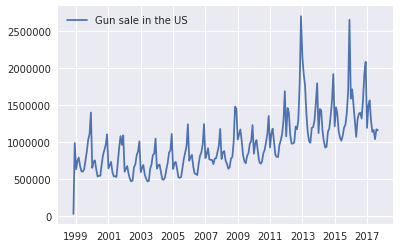

In [43]:
# Plot using matplotlib and seaborn
x = df_gun2_trend['month']
y = df_gun2_trend['total_gun']
sns.set()
plt.plot(x, y, label = 'Gun sale in the US')
plt.legend()

The above figure shows the overall trend of the gun sale in the past dacades with some seasonal variations. The sales are largest in the year of 2013 and 2016.

### Research Question 3： Which state has the highest total gun sale?

In [44]:
# Group the gun sale by state
df_gun3 = df_gun2.groupby('state').sum()
df_gun3['total_gun'] = df_gun3['handgun'] + df_gun3['long_gun'] + df_gun3['multiple']
df_gun3.head(100)

,handgun,long_gun,multiple,total_gun
state,,,,
Alabama,2688664.77,3177495.09,420920,6287079.86
Alaska,525868.42,692330.54,115616,1333814.96
Arizona,2155576.28,1791722.02,339916,4287214.30
Arkansas,1168356.64,2012539.76,247676,3428572.40
California,7152164.80,7183491.70,831456,15167112.50
Colorado,3059390.62,3298499.93,1227484,7585374.55
Connecticut,1063904.60,772096.16,32096,1868096.76
Delaware,251811.89,293104.35,33076,577992.24
District of Columbia,5529.70,732.05,160,6421.75


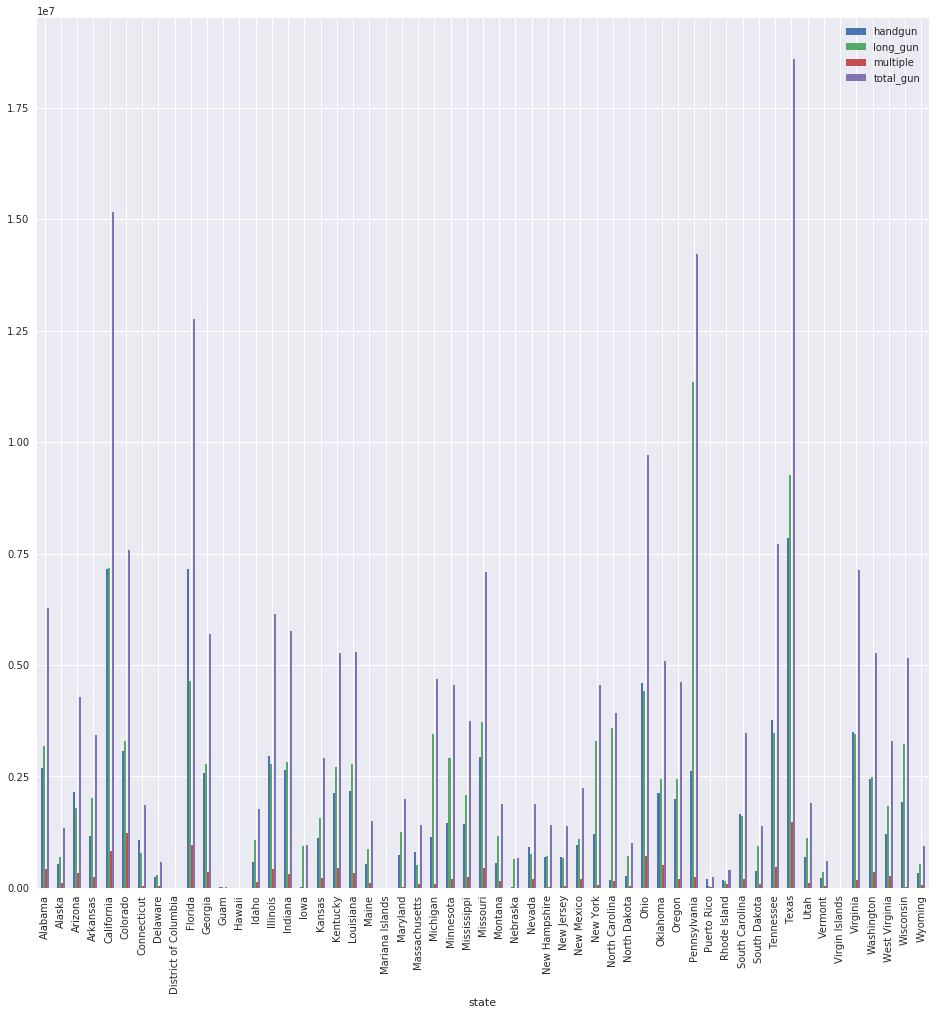

In [45]:
# Plot the total gun sale in each state using a bar plot
df_gun3.plot.bar(figsize=(16,16))

The above figure demonstrates the state of Taxes has the highest total gun sale, following by California, Pennsylvania, and Florida.

### Research Question 4： What census data is most associated with high gun sale per capita?

In [46]:
# Remove the states that are not considered in the Census data
df_gun3.drop(['District of Columbia', 'Guam', 'Puerto Rico', 'Mariana Islands', 'Virgin Islands'], axis= 0, inplace = True)
# Add the total gun sale of each state in a new row
df_c4 = df_c3.append(df_gun3.total_gun.T)

In [47]:
# Add note which will be used as index
df_c5 = df_c4.fillna('gun')
df_c5.head(80)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Population estimates July 1 2016 (V2016),4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
1,Population estimates base April 1 2010 (V2016),4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
2,Population percent change - April 1 2010 (esti...,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,Population Census April 1 2010,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
4,Persons under 5 years percent July 1 2016 (V2...,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,Persons under 5 years percent April 1 2010,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,Persons under 18 years percent July 1 2016 (V...,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,Persons under 18 years percent April 1 2010,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,Persons 65 years and over percent July 1 2016...,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,Persons 65 years and over percent April 1 2010,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [48]:
#df_c3 = df_c2.replace({'\$':''}, regex = True)
#df_c3 = df_c3.replace({'\,':''}, regex = True)
#df_c4 = df_c3.drop(42, axis = 0, inplace = False)
#df_c5 = df_c4.drop(53, axis = 0, inplace = False)
#df_c6 = df_c5.drop(16, axis = 0, inplace = False)
#df_c7 = df_c6

In [49]:
# Reset the index to 'Fact'
df_c5.set_index(['Fact'], inplace = True) 
df_c5

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
Population estimates July 1 2016 (V2016),4863300,741894,6931071,2988248,39250017,5540545,3576452,952065,20612439,10310371,...,865454,6651194,27862596,3051217,624594,8411808,7288000,1831102,5778708,585501
Population estimates base April 1 2010 (V2016),4780131,710249,6392301,2916025,37254522,5029324,3574114,897936,18804592,9688680,...,814195,6346298,25146100,2763888,625741,8001041,6724545,1853011,5687289,563767
Population percent change - April 1 2010 (estimates base) to July 1 2016 (V2016),1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
Population Census April 1 2010,4779736,710231,6392017,2915918,37253956,5029196,3574097,897934,18801310,9687653,...,814180,6346105,25145561,2763885,625741,8001024,6724540,1852994,5686986,563626
Persons under 5 years percent July 1 2016 (V2016),6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
Persons under 5 years percent April 1 2010,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,7.10%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
Persons under 18 years percent July 1 2016 (V2016),22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,24.40%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
Persons under 18 years percent April 1 2010,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,25.70%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
Persons 65 years and over percent July 1 2016 (V2016),16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,13.10%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%


In [50]:
# Remove the % sign and convert to float type
df_c6 = df_c5.replace({'\%':''}, regex = True).astype('float') / 100
# Calculate the gun per capita as a new row
df_c6.loc['gun_per_capita',:] = (df_c6.loc['gun', :]/df_c6.loc['Population estimates July 1 2016  (V2016)', :]).T

In [51]:
# Check index
df_c6.index
# Calculate the correlation between the gun_per_capita and the census facts
df_c6.T.corr(method='pearson', min_periods=1)['gun_per_capita'].sort_values(ascending = False)

Fact
gun_per_capita                                                                          1.000000
Land area in square miles 2010                                                          0.354037
American Indian and Alaska Native alone percent July 1 2016  (V2016)                    0.346518
Total retail sales per capita 2012                                                      0.195351
With a disability under age 65 years percent 2011-2015                                  0.139840
White alone not Hispanic or Latino percent July 1 2016  (V2016)                         0.117883
Persons  without health insurance under age 65 years percent                            0.104854
Persons in poverty percent                                                              0.049898
White alone percent July 1 2016  (V2016)                                                0.028916
gun                                                                                    -0.019642
Owner-occupied housing un

Interestingly the "Land area in square miles 2010" and "American Indian and Alaska Native alone percent July 1 2016" are the most positively correlated to the high gun sale per capita. The "Mean travel time to work (minutes) workers age 16 years+ 2011-2015" and "Population per square mile 2010" are the most negatively correlated factor to the high gun sale per capita.

<a id='conclusions'></a>
## Conclusions
1. Kentucky state has the highest growth in gun registrations. The gun registrations of the most current month (February - 2019) are 397866 more than that of the earliest month in the record (Novermber 1998).
2. The overall trend of the gun sale in the past dacades has some seasonal variations. The sales are largest in the year of 2013 and 2016. More guns are sold in the recent dacade than the previous decade.
3. The state of Taxes has the highest total gun sale, following by California, Pennsylvania, and Florida.
4. "Land area in square miles 2010" and "American Indian and Alaska Native alone percent July 1 2016" are the most positively correlated to the high gun sale per capita. The "Mean travel time to work (minutes) workers age 16 years+ 2011-2015" and "Population per square mile 2010" are the most negatively correlated factor to the high gun sale per capita. It is worth noting that the correlation is not causation. More studies are needed for a better understanding of the high gun sale per capita.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])